# GSE 512: Markov Matrices and Asset Prices

### David Ngo

#### Download the file GDP_cycle_1948_2020.csv from Canvas, put that file in your working directory, and upload it into a Jupyter notebook.  These are the data Y_cycle from Problem Set 3.

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import data
data = pd.read_csv('GDP_cycle_1948_2020.csv')

# Print top of data
print(data.head())

# Print summary statistics
data.describe()

   Unnamed: 0  GDP cycle
0  1948-01-01   0.020398
1  1948-04-01   0.024427
2  1948-07-01   0.017784
3  1948-10-01   0.006505
4  1949-01-01  -0.019847


,GDP cycle
count,2.920000e+02
mean,-2.727821e-14
std,1.677406e-02
min,-8.663752e-02
25%,-8.937541e-03
50%,7.092083e-04
75%,1.151963e-02
max,3.721640e-02


#### Plot a histogram of the data. In this case, we count the number of GDP cycles based on their GDP rate.

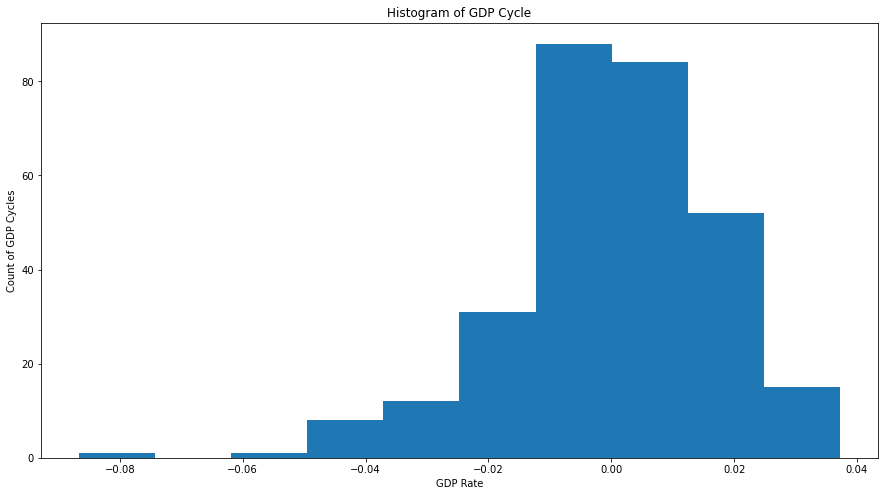

In [2]:
# Set figure size
plt.figure(figsize=(15,8))

# Create histogram 
plt.hist(data["GDP cycle"])

# Label title and axis
plt.title('Histogram of GDP Cycle')
plt.ylabel('Count of GDP Cycles')
plt.xlabel('GDP Rate')

# Print histogram
plt.show()

#### Just for my own refernce, I was also interested in looking at the fluctuations of GDP cycle overtime.

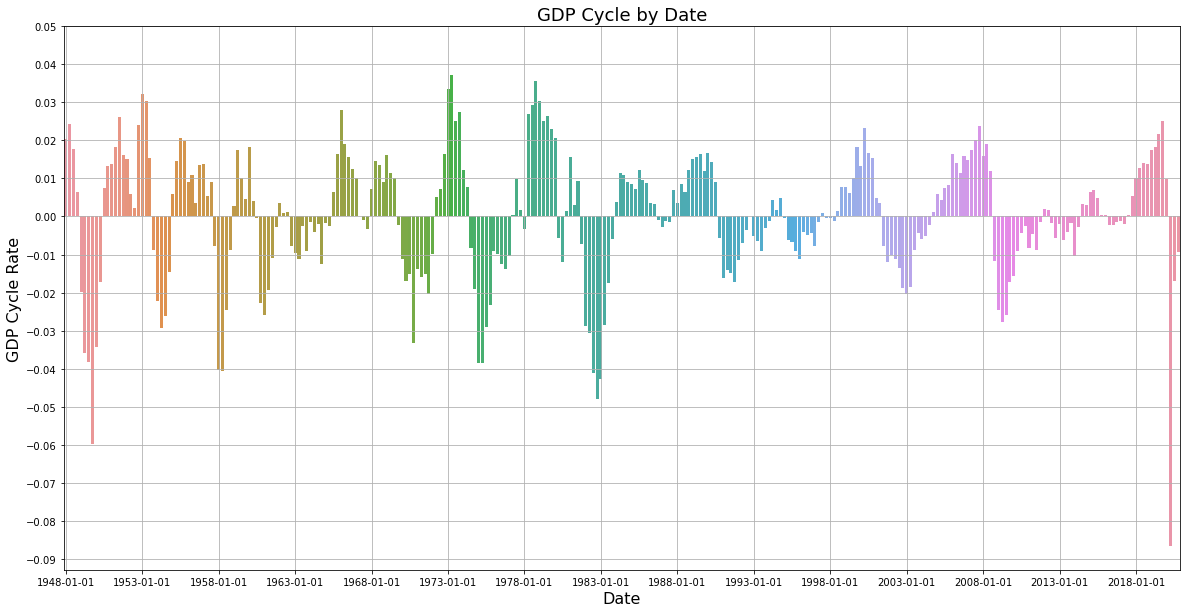

In [3]:
# Adjust the figure size
plt.figure(figsize=(20,10))

# Adjust fonts
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=16) 

# Create histogram
ax = plt.subplot()
sns.barplot(data = data, x = "Unnamed: 0", y = "GDP cycle")

# Adjust x-ticks
plt.xticks(np.arange(0, len(data)+1, 20))
ax.set_xticklabels(data['Unnamed: 0'][0::20])

# Adjust y-ticks
plt.yticks(np.arange(round(min(data['GDP cycle']),2), round(max(data['GDP cycle'])+.01,2), .01))

# Customize labels
plt.title('GDP Cycle by Date')
plt.xlabel('Date')
plt.ylabel('GDP Cycle Rate')



# Superimpose a grid
plt.grid(True)

# Print histogram
plt.show(ax)

#### Sort the data, and divide them into four quartiles  (There are 292 points of data, and 292/4 = 73).  Compute the intra-quartile means.  Exponentiate each of these four numbers.  These will be your consumption vector c = (c0, c1, c2, c3).   I computed: array([0.97856301, 0.99641611, 1.00625707, 1.01945654]). I did this in two ways:

In [4]:
q = [0.25, 0.5, 0.75, 1]
z=np.quantile(data['GDP cycle'], q)

n=int(len(data['GDP cycle'])/4)  #how many observations in each quartile  I think 292/4 = 73
GDP_sorted=sorted(data['GDP cycle'])  #sort them, so I can get the requisite inter-quartile means
c0=np.mean(GDP_sorted[0:n])
c1=np.mean(GDP_sorted[(n+1):2*n])
c2=np.mean(GDP_sorted[(2*n+1):3*n])
c3=np.mean(GDP_sorted[(3*n+1):4*n])
c=np.exp([c0,c1,c2,c3])  #normalized consumption = 1
c  # I have my consumption vector!

array([0.97856301, 0.99641611, 1.00625707, 1.01945654])

#### We have a second, less automated method.

In [5]:
# sort the data from lowest to highest
gdp_cycle = np.sort(data['GDP cycle'])

# Divide data into four quantiles
quart = []

# 1948-01-01 to 1966-01-01
quart.append(gdp_cycle[0:73])

# 1966-04-01 to 1984-04-01
quart.append(gdp_cycle[73:146])

# 1984-07-01 to 2002-07-01
quart.append(gdp_cycle[146:219])

# 2002-10-01 to 2020-10-01
quart.append(gdp_cycle[219:292])

# Compute the intra-quartile means
quart_mean = [np.mean(quart[0]), round(np.mean(quart[1]),100), np.mean(quart[2]), np.mean(quart[3])]

In [6]:
#Check that we divide the quantiles correctly
print(len(quart[0]),len(quart[1]),len(quart[2]),len(quart[3]))

73 73 73 73


In [7]:
# Compute the intra-quartile means
quart_mean = [np.mean(quart[0]), round(np.mean(quart[1]),100), np.mean(quart[2]), np.mean(quart[3])]

# Print the intra-quartile means
print(quart_mean)

[-0.02167009885398331, -0.0036635657042493647, 0.006165038722998571, 0.01916862583512499]


In [8]:
# Consumption vector 
con_v = np.exp(quart_mean)

# Print the consumption vector
print(con_v)

[0.97856301 0.99634314 1.00618408 1.01935352]


#### Classify the data into four states according to the quartile each observation falls into.  I computed these initial 17 classifications: array([3., 3., 3., 2., 0., 0., 0., 0., 0., 0., 2., 3., 3., 3., 3., 3., 3.]). We do this in two ways:

In [9]:
def classify(x,q):
    """
    x is the data
    q are the quartiles
    """
    n=len(q)  # number of group
    coarse = np.zeros(len(x))  #zero out the output
    for i in range(n):
        if i == 0:
            coarse[np.less_equal(x,z[i])]=i  #these observations are in the first quartile
        coarse[np.logical_and(np.greater(x,z[i-1]),np.less_equal(x,z[i]))]=i
        #nice use of array-oriented logical functions
    return(coarse)

In [10]:
states=classify(data['GDP cycle'],q)
states #check my work

array([3., 3., 3., 2., 0., 0., 0., 0., 0., 0., 2., 3., 3., 3., 3., 3., 3.,
       2., 2., 3., 3., 3., 3., 1., 0., 0., 0., 0., 2., 3., 3., 3., 2., 2.,
       2., 3., 3., 2., 2., 1., 0., 0., 0., 1., 2., 3., 2., 2., 3., 2., 1.,
       0., 0., 0., 0., 1., 2., 2., 2., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 2., 3., 3., 3., 3., 3., 2., 1., 1., 1., 2., 3., 3., 2., 3.,
       2., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 3., 3., 3.,
       3., 3., 3., 2., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 2.,
       2., 1., 3., 3., 3., 3., 3., 3., 3., 3., 1., 0., 2., 3., 2., 2., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 2., 2., 2., 2., 2., 2., 3., 2., 2.,
       2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       2., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 2., 2.,
       2., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
       2., 2., 2., 3., 3., 3., 3., 3., 2., 2., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1.

#### We have a second, less automated method.

In [11]:
# Initialize empty array
states = []

for i in range(len(data)): # Loop through each observation
    obs = data['GDP cycle'][i] # Initialize observation
    if obs >= min(quart[0]) and obs <= max(quart[0]): # If obs is in the bounds of 1st quartile
        states.append(0) # Add an elment = 0 to states
    if obs >= min(quart[1]) and obs <= max(quart[1]):
        states.append(1)
    if obs >= min(quart[2]) and obs <= max(quart[2]):
        states.append(2)
    if obs >= min(quart[3]) and obs <= max(quart[3]):
        states.append(3)

print(states)

# Check that first 17 classifications match
test = [3., 3., 3., 2., 0., 0., 0., 0., 0., 0., 2., 3., 3., 3., 3., 3., 3.]
print(states[0:17] == test)


[3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 0, 0, 0, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 1, 0, 0, 0, 1, 2, 3, 2, 2, 3, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 3, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 3, 2, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 2, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0]
True


#### Estimate the 4 x 4 Markov transition matrix.  My first row looked like this: array([[0.75 , 0.19444444, 0.05555556, 0. ]). There are 291 transitions.  You will construct a 4 x 4 matrix of counts.  Look at the first classified data point.  It transits from 3 to 3.  So the M(3,3) count increments by one.  The second transition is also from 3 to 3.  So now M(3,3) = 2.  Do this for all the transitions, and then normalize each row by its row sum.  Then each row is a probability distribution. We do this in two ways:

In [12]:
def estimate_markov(x,dim):
    """
    x is the data classified by state
    dim is the dimension of the classification
    
    """
    n=len(x) # number of observations
    m=np.zeros((dim,dim))  # start out with a matrix full of zeros
    for i in range (n-1): #there is no final transition
        m[int(x[i]),int(x[i+1])] +=1 # increment the transition count
    row_sums = sum(m.T)  # get row sums
    m = m/row_sums[:,None]  #divides the rows of matrix m by vector row_sums
    return(m)

In [13]:
dim=len(q)
m_usa=estimate_markov(states,dim)

In [14]:
m_usa  #check my work

array([[0.75      , 0.19444444, 0.05555556, 0.        ],
       [0.21917808, 0.57534247, 0.19178082, 0.01369863],
       [0.02739726, 0.20547945, 0.53424658, 0.23287671],
       [0.01369863, 0.02739726, 0.21917808, 0.73972603]])

#### I did the above in another, less efficient way.

In [15]:
# Initialize 4x4 matrix
m = [[0]*4 for k in range(4)]

# Count increments by 1 for all transitions
for (i,j) in zip(states,states[1:]):
    m[i][j] += 1

# Convert to probabilities
for row in m:
    n = sum(row)
    if n > 0:
        row[:] = [q/sum(row) for q in row] # normalizing each row by its row sum

# Print m, the markov transition matrix
m = np.array(m)
print(m)

[[0.75       0.19444444 0.05555556 0.        ]
 [0.21917808 0.57534247 0.19178082 0.01369863]
 [0.02739726 0.20547945 0.53424658 0.23287671]
 [0.01369863 0.02739726 0.21917808 0.73972603]]


#### Use my code from 2 February 2021 to determine the real interest rates in each state.  Use beta = 0.97**(1/4) because we have quarterly data, and then raise the interest rates that you compute to the fourth power.

In [16]:
## The following code is from Eric Fisher's GSE 522 Lecture Notes: 2 February 2021 ##

# Now I can price assets
def kern(c0,c1,rho):
    """
    This function returns an asset pricing kernel 
    c0 is current consumption
    c1 is the vector of future consumptions
    rho is the inter-temporal elasticity of substitution
    """
    if rho == 1:
        return np.true_divide(1,c1)/(1/c0) 
    else: 
        return np.power(c1,-rho)/c0**(-rho)
    
def mkern(c,beta,rho):
    n = len(c) # number of states
    K=np.zeros((n,n)) # start with an array of zeros
    for i in range (n):
        K[i,:] = beta*kern(c[i],c,rho)  # each row is an asset pricing kernel for consumption in state i
    return(K)

def pricing(M,K,R):
    """
    M is a markov matrix
    K is a pricing kernel
    R is a matrix of asset payouts.
    The asset returns are by column
    """
    if M.shape != K.shape:
        return('Markov matrix and pricing kernels are not conformable.')
    if M.shape[1] != R.shape[0]:
        return('Asset price matrix is not conformable.')
    P = np.matmul(np.multiply(M,K), R)  
    # element by element multiplication of the pricing kernel with the markov probabilities
    return(P)

def markov(m,t):
    """
    This code takes a Markov matrix m and returns the t-step ahead forecast matrix
    """
    n=m.shape[0] # number of rows
    if (m.shape[0] != m.shape[1]): #test for a square matrix
        return('Matrix is not square') 
    if (not (np.matmul(m,np.ones(n))==1).all()): #test row sums 
        return('This is not a Markov matrix')
    if( not ((m >= 0).all() and (m <= 1).all())): #test probabilities
        return('This is not a Markov matrix')
    m_T= np.linalg.matrix_power(m,t)
    return(m_T)

In [17]:
## Using the above functions, compute the real interest rates for each state ##

# Markov transition matrix redifined as M

M = np.array(m)

# Compute the t-step ahead forecast matric
LR = markov(M,1000) 

# We also need the following constants
beta=0.97**(.25)
rho=2 # inter-temporal elasticity of substitution
c = con_v #consumption vector
K = mkern(c,beta,rho) # Computing the asset pricing kernel
r = np.array([[1],[1],[1],[1]])
R = np.array([[1, 1, 0, 0, 0],
             [1,0, 1, 0, 0],
             [1, 0, 0, 1, 0],
             [1,0, 0, 0, 1]]) # matrix of asset payouts

# Apply the pricing function
p = pricing(M,K,r) # asset returns

# Compute the real interest rates for each state
interest_rate = (1/p[:,0])**(4)

# Print the real interest rate (the Gross real interest rates at an annual rate)
print(interest_rate)

[1.07272367 1.0158402  1.03229312 0.9977127 ]


#### Compute the long-run average interest rate.  I got 1.03065

In [18]:
# The number of elements in each dimension (4 by 4)
LR.shape

# Take one row from LR (elements of each row are identical)
lr = LR[0,:]

# Print lr
print(lr)

[0.26367792 0.25526668 0.24679961 0.23425579]


In [19]:
# Apply interest_rate to lr to account for t-step ahead forecasting in the long-run average interst rate
round(lr@interest_rate,5)

1.03065

#### Notes:

To clarify, I computed the same answer to the 5th decimal place. I believe that the small difference between the given answer and my computed answer is due to rounding error, which likely occured when computing the interquartile means and exponentiating them. 

In comparing with another student, rounding error could have occured due to how I manipulated the data (I transfered GDP cycles into an array before making computations, whereas another student directly manipulated the data from the dataframe). 

I still find that the real interest rates for four states and the long range interest I had computed is accurate at least to the 5th decimal place. Otherwise, classifying the data into four states and computing the Markov transition matrix computed identical (and correct) answers.

#### There is a more efficient way to comoute the above:

In [20]:
beta = (0.97)**(0.25) # quarterly data!
rho=2
# I defined the consumption vector c above
K=mkern(c,beta,rho)
K #check my work

array([[0.99241412, 0.95731014, 0.93867584, 0.91457825],
       [1.02880534, 0.99241412, 0.97309651, 0.94811528],
       [1.04922886, 1.01211521, 0.99241412, 0.96693696],
       [1.07687427, 1.03878274, 1.01856255, 0.99241412]])

In [21]:
#define an array of 5 assets: a bond, and the four canonical Arrow securites
R = np.array([[1, 1, 0, 0, 0],
             [1,0, 1, 0, 0],
             [1, 0, 0, 1, 0],
             [1,0, 0, 0, 1]])

In [22]:
# Now I can price assets

def pricing(M,K,R):
    """
    M is a markov matrix
    K is a pricing kernel
    R is a matrix of asset payouts.
    The asset returns are by column
    """
    if M.shape != K.shape:
        return('Markov matrix and pricing kernels are not conformable.')
    if M.shape[1] != R.shape[0]:
        return('Asset price matrix is not conformable.')
    P = np.matmul(np.multiply(M,K), R)  
    # element by element multiplication of the pricing kernel with the markov probabilities
    return(P)

In [23]:
mkern(c,beta,rho)
p=pricing(m_usa,K,R)
p #check my work

array([[0.98260288, 0.74431059, 0.18614364, 0.05214866, 0.        ],
       [0.9960787 , 0.22549158, 0.57097799, 0.18662125, 0.01298788],
       [0.99208582, 0.028746  , 0.20796888, 0.53019384, 0.2251771 ],
       [1.00057264, 0.0147517 , 0.0284598 , 0.22324659, 0.73411455]])

In [24]:
interest_rates = (1/p[:,0])**4
print( 'Gross real interest rates at an annual rate are ', interest_rates)

Gross real interest rates at an annual rate are  [1.07272367 1.0158402  1.03229312 0.9977127 ]


In [25]:
def ergodic(m):
    """
    This code finds the ergodic distribution of a Markov matrix
    """
    n=m.shape[0] # number of rows
    T = 1000 # useful constant
    eps=0.0001 #useful constant
    if (m.shape[0] != m.shape[1]): #test for a square matrix
        return('Matrix is not square') 
    if (not (np.matmul(m,np.ones(n))==1).all()): #test row sums 
        return('This is not a Markov matrix')
    if( not ((m >= 0).all() and (m <= 1).all())): #test probabilities
        return('This is not a Markov matrix')
    m_long = np.linalg.matrix_power(m,T)
    if( not ((m_long > 0).all() and (m_long < 1).all())): #crude test for aperiodic and irreducible
        return('This matrix may not be both aperiodic and irreducible')
    w,v = np.linalg.eig(m.T) #Need the left eigenvector; that's why we transpose
    choose = (abs(w-1) < eps)
    m_long = v[:,choose]/sum(v[:,choose])  #Need to make the eigenvector into a probability vector.
    return(m_long)

In [26]:
long_run=ergodic(m_usa)
long_run #check my work

array([[0.26367792],
       [0.25526668],
       [0.24679961],
       [0.23425579]])

In [27]:
print('The long-run average real interest rate is', np.dot(long_run.T,interest_rates))

The long-run average real interest rate is [1.03065322]
